## Prepare

In [33]:
import random
import networkx as nx
import igraph as ig
import time
import matplotlib.pyplot as plt

def generate_random_graph(n_nodes, avg_degree):
    nodes = list(range(n_nodes))
    edges = []

    # 必要なエッジ数を計算
    n_edges = int(n_nodes * avg_degree / 2)

    random.seed(42)

    # 各ノードに少なくとも1つのエッジを追加
    for node in nodes:
        other_nodes = nodes.copy()
        other_nodes.remove(node)
        v = random.choice(other_nodes)
        edges.append((node, v))

    # 残りのエッジを生成してエッジに追加
    while len(edges) < n_edges:
        u, v = random.sample(nodes, 2)
        if (u, v) not in edges and (v, u) not in edges and u != v:
            edges.append((u, v))

    print(f"Nodes: {n_nodes}, Edges: {len(edges)}")
    return nodes, edges

def draw_networkx(nodes, edges):
    # prepare
    G_nx = nx.Graph()
    G_nx.add_nodes_from(nodes)
    G_nx.add_edges_from(edges)
    pos = nx.kamada_kawai_layout(G_nx)

    # plot
    fig, ax = plt.subplots(figsize=(5, 5))
    nx.draw(G_nx, pos, node_size=10, width=0.5, with_labels=False, ax=ax)
    plt.axis("off")
    plt.show()

def draw_igraph(nodes, edges):
    # prepare
    G_ig = ig.Graph()
    G_ig.add_vertices(nodes)
    G_ig.add_edges(edges)
    pos = G_ig.layout("kk")

    # plot
    fig, ax = plt.subplots(figsize=(5, 5))
    ig.plot(G_ig, layout=pos, target=ax, vertex_size=5, edge_width=0.5, vertex_label=None)
    plt.axis("off")
    plt.show()

def measure_time(func, *args, **kwargs):
    start_time = time.time()
    func(*args, **kwargs)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"{func.__name__} execution time: {execution_time:.2f} seconds")

def main(n_nodes, avg_degree, only_igraph=False):
    # それぞれの時間を計測
    nodes, edges = generate_random_graph(n_nodes, avg_degree)
    if not only_igraph:
        measure_time(draw_networkx, nodes, edges)
    measure_time(draw_igraph, nodes, edges)


## degree = 2

Nodes: 10, Edges: 10


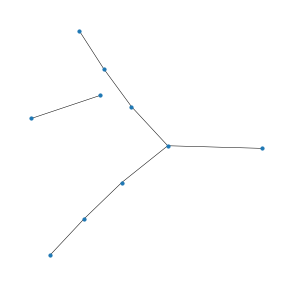

draw_networkx execution time: 0.05 seconds


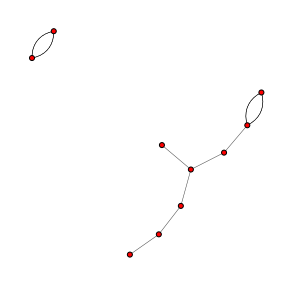

draw_igraph execution time: 0.16 seconds


In [58]:
main(10, 2)

Nodes: 21, Edges: 21


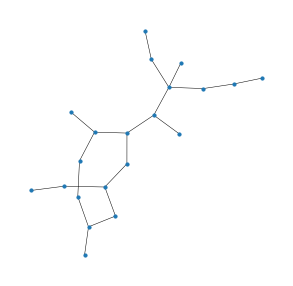

draw_networkx execution time: 0.05 seconds


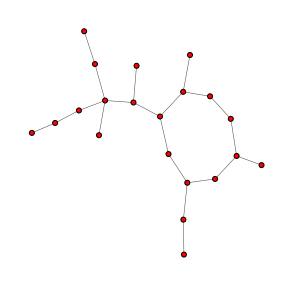

draw_igraph execution time: 0.29 seconds


In [52]:
main(21, 2)

Nodes: 46, Edges: 46


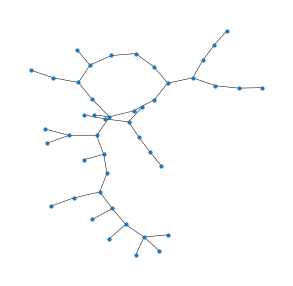

draw_networkx execution time: 0.06 seconds


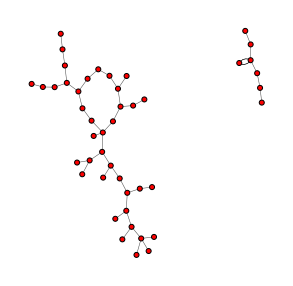

draw_igraph execution time: 0.60 seconds


In [53]:
main(46, 2)

Nodes: 100, Edges: 100


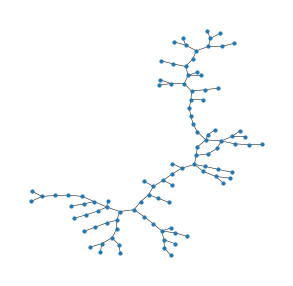

draw_networkx execution time: 0.11 seconds


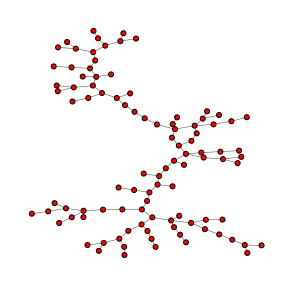

draw_igraph execution time: 0.98 seconds


In [35]:
main(100, 2)

Nodes: 215, Edges: 215


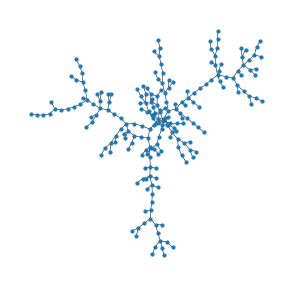

draw_networkx execution time: 0.50 seconds


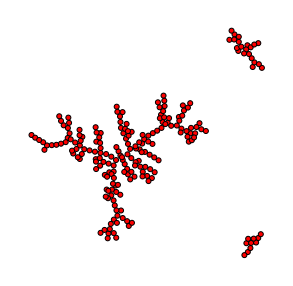

draw_igraph execution time: 2.67 seconds


In [54]:
main(215, 2)

Nodes: 464, Edges: 464


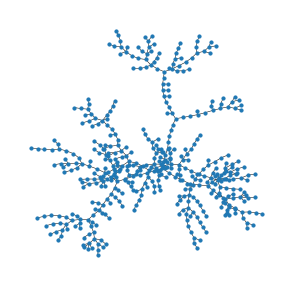

draw_networkx execution time: 2.21 seconds


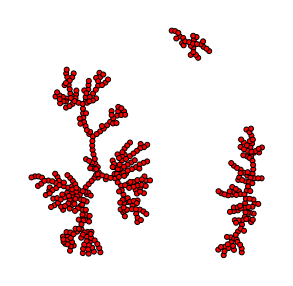

draw_igraph execution time: 5.84 seconds


In [55]:
main(464, 2)

Nodes: 1000, Edges: 1000


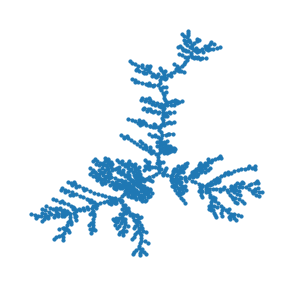

draw_networkx execution time: 10.63 seconds


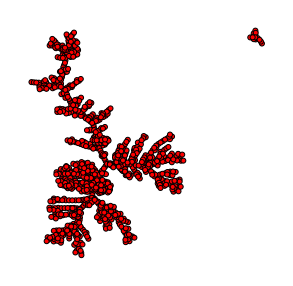

draw_igraph execution time: 9.66 seconds


In [36]:
main(1000, 2)

Nodes: 2154, Edges: 2154


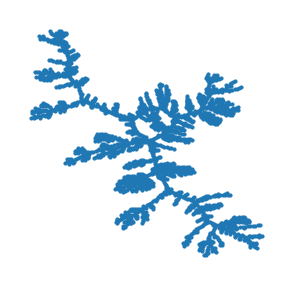

draw_networkx execution time: 86.94 seconds


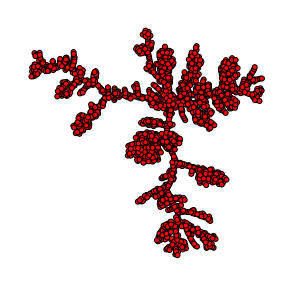

draw_igraph execution time: 30.77 seconds


In [56]:
main(2154, 2)


Nodes: 4641, Edges: 4641


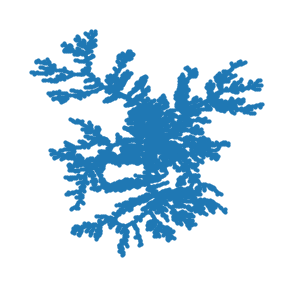

draw_networkx execution time: 309.36 seconds


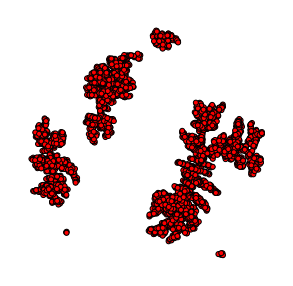

draw_igraph execution time: 84.08 seconds


In [57]:
main(4641, 2)

Nodes: 10000, Edges: 10000


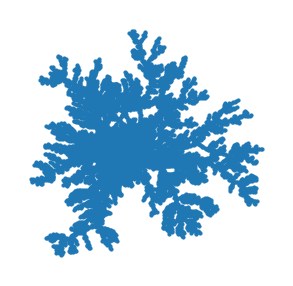

draw_networkx execution time: 2364.59 seconds


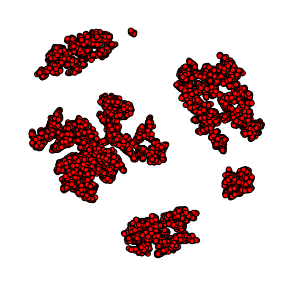

draw_igraph execution time: 247.94 seconds


In [39]:
main(10000, 2)

In [13]:
import numpy as np

n_nodes_list = np.logspace(1, 4, num=10, dtype=int)
n_nodes_list

array([   10,    21,    46,   100,   215,   464,  1000,  2154,  4641,
       10000])

In [14]:
import matplotlib.pyplot as plt

def plot_results(n_nodes_list, networkx_times, igraph_times):
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(n_nodes_list, networkx_times, marker='o', label='NetworkX')
    ax.plot(n_nodes_list, igraph_times, marker='o', label='igraph')

    ax.set_xlabel('Number of Nodes')
    ax.set_ylabel('Execution Time (seconds)')

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.legend()
    ax.grid(True)

    plt.title('NetworkX vs igraph: Execution Time (Changing Number of Nodes)')
    fig.tight_layout()
    plt.show()

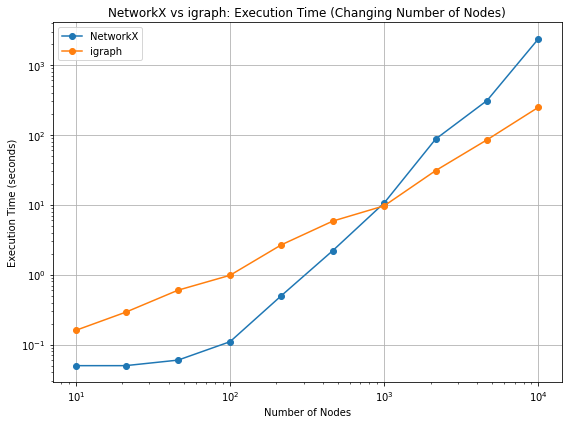

In [15]:
networkx_times = [0.05, 0.05, 0.06, 0.11, 0.50, 2.21, 10.63, 86.94,309.36,  2364.59]
igraph_times = [0.16, 0.29, 0.60, 0.98, 2.67, 5.84, 9.66, 30.77, 84.88, 247.94]
plot_results(n_nodes_list, networkx_times, igraph_times)

## n_nodes = 1000

Nodes: 1000, Edges: 1000


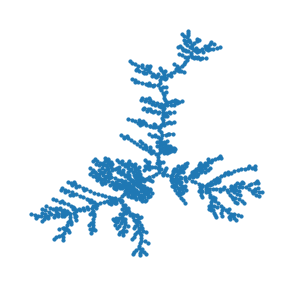

draw_networkx execution time: 14.13 seconds


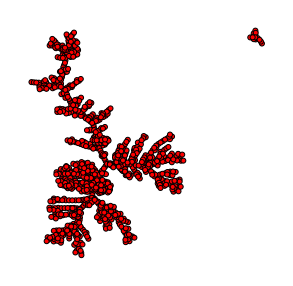

draw_igraph execution time: 13.02 seconds


In [76]:
main(1000, 2)

Nodes: 1000, Edges: 2000


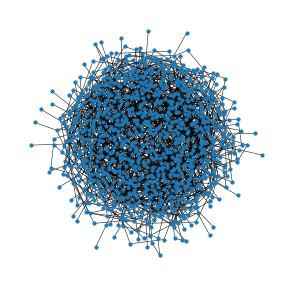

draw_networkx execution time: 18.18 seconds


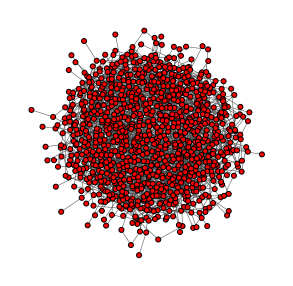

draw_igraph execution time: 13.52 seconds


In [77]:
main(1000, 4)

Nodes: 1000, Edges: 4000


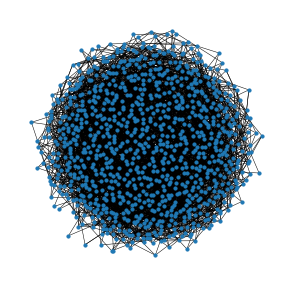

draw_networkx execution time: 33.86 seconds


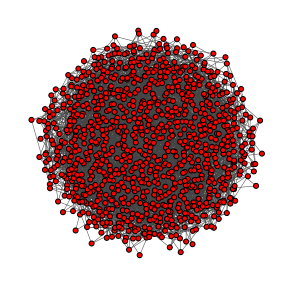

draw_igraph execution time: 13.86 seconds


In [79]:
main(1000, 8)

Nodes: 1000, Edges: 8000


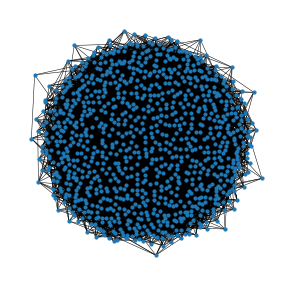

draw_networkx execution time: 85.23 seconds


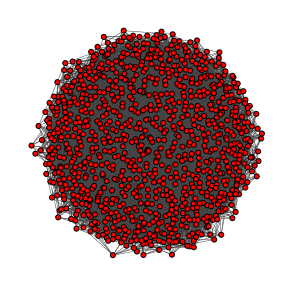

draw_igraph execution time: 14.66 seconds


In [84]:
main(1000, 16)

In [10]:
n_edges_list = [2, 4, 8, 16]

In [11]:
import matplotlib.pyplot as plt

def plot_results(n_edges_list, networkx_times, igraph_times):
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(n_edges_list, networkx_times, marker='o', label='NetworkX')
    ax.plot(n_edges_list, igraph_times, marker='o', label='igraph')

    ax.set_xlabel('Average Degree')
    ax.set_ylabel('Execution Time (seconds)')

    ax.set_xscale('log')
    # ax.set_yscale('log')

    ax.legend()
    ax.grid(True)

    plt.title('NetworkX vs igraph: Execution Time (Changing Average Degree)')
    fig.tight_layout()
    plt.show()

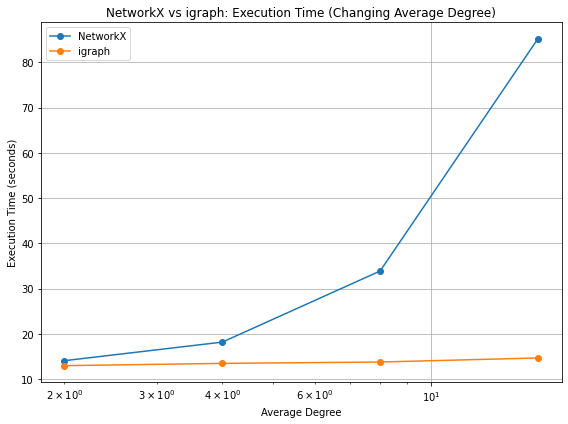

In [12]:
networkx_times = [14.1, 18.2, 33.9, 85.2]
igraph_times = [13.0, 13.5, 13.8, 14.7]
plot_results(n_edges_list, networkx_times, igraph_times)